<a href="https://colab.research.google.com/github/fernandofabril/data_science/blob/main/DSNP_3_0_Projeto_1_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Porto/Portugal*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Porto/Portugal, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Porto (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/portugal/norte/porto/2022-06-10/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Caso o conjunto não esteja vais diponível, entre no [Inside Airbnb](http://insideairbnb.com/get-the-data.html), e altere o endereço de localização do arquivo na constante `DATA_PATH`.

Com isso em mente, vamos ao projeto.



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Criamos uma variável `DATA_PATH`  que recebe o endereço http/https do conjunto de dados.

In [ ]:
# importar o arquivo listings.csv para um DataFrame
DATA_PATH = 'http://data.insideairbnb.com/portugal/norte/porto/2022-06-10/visualisations/listings.csv'
df = pd.read_csv(DATA_PATH, sep=',')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - Identificador unico do Aribnb
* `name` - Nome do imóvel
* `host_id` - Identificador do anfitrião / proprietário do imóvel
* `host_name` - Nome do anfitrião / prorietário do imóvel
* `neighbourhood_group` - Grupo de bairros
* `neighbourhood` - Nome do bairro
* `latitude` - Cordenada geografica de Latitude
* `longitude` - Cordenada geografica de Longitude
* `room_type` - Tipo de lugar para ficar
* `price` - Preço da locação
* `minimum_nights` - Número minimo de noites para locação
* `number_of_revies` - Número de reviews de quem locou o imóvel
* `last_review` - Data do ultimo review
* `reviews_per_month` - Número de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - Número de reviews nos ultimos 12 meses
* `license` - O número da licença/registro


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,20480198,Casa de São João,146202861,Casa De São João,VALE DE CAMBRA,Arões,40.78164,-8.24340,Entire home/apt,150,1,4,2021-08-14,0.07,1,164,2,NaN
1,52337524,Detached Guest House in Luxury Villa with Pool,423414022,Eduardo,TROFA,Bougado (São Martinho e Santiago),41.34749,-8.56984,Entire home/apt,100,2,2,2022-06-04,2.00,1,339,2,13286/AL
2,18616304,Rustic house by the beach,129318702,Cecília,ESPINHO,Paramos,40.96200,-8.65137,Entire home/apt,110,5,30,2021-08-21,0.51,1,57,2,56289/AL
3,49499436,Moradia geminada moderna a 2m da praia,399215419,Fernando,ESPINHO,Paramos,40.95583,-8.65506,Entire home/apt,90,7,0,NaN,NaN,1,64,0,115355/AL
4,596254806601732230,"The Shore @ Atlantic Beachfront - Patio, Tiny ...",131440428,Elisa & André,ESPINHO,Espinho,41.00201,-8.64707,Entire home/apt,134,4,3,2022-05-31,2.20,3,291,3,123474/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Foi baixado uma versão resumida do conjunto de dados `listings.csv`.

No mesmo site tem um outro arquivo que é uma versão detalhada `listings.csv.gz`

Nesse conjunto de dados que estamos trabalhando temos 11.114 entradas e 18 variáveis

In [ ]:
# identificar o volume de dados do DataFrame
print('Número de Registros/Entradas:\t {}'.format(df.shape[0]))
print('Número de Colunas/Variáveis:\t {}\n'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Número de Registros/Entradas:	 11114
Número de Colunas/Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` e `last_review` estão com 12% de valores 
nulos, então temos que entender se esses valores vão interferir na nossa analise ou se vamos ter que eliminar essas entradas ou atribuir algum valor a elas.

*  A variável `license` está com 7% de valores núlos, porém essa variável não vai ter influência na nossa analise.

* As outras variáveis não tem valor nulo.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

reviews_per_month                 12.551737
last_review                       12.551737
license                            7.144143
host_name                          0.008998
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
name                               0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, vamos plotar um histograma.

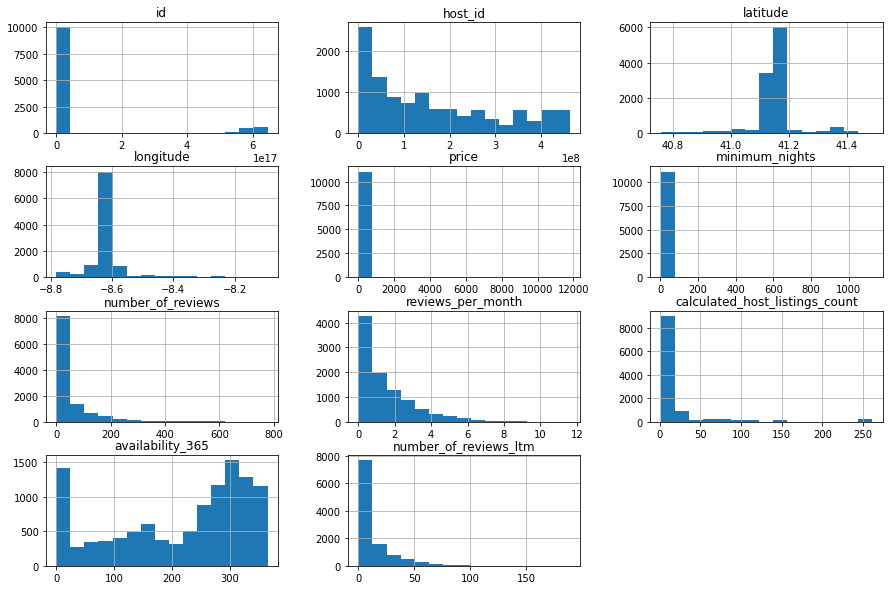

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

### **Q4. Qual a média dos preços de aluguel?**

A média de preços do valor do alguel está em 114,84. Porém é importante analisar os valores `min`(minimo) e `max`(maximo) para verificar se existe algum outlier.

Essa diferença muito grande pode influênciar na média `mean`.

In [ ]:
# ver a média da coluna `price`
df.price.describe()

count    11114.000000
mean       114.840741
std        260.929701
min          9.000000
25%         55.000000
50%         81.000000
75%        120.000000
max      11799.000000
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

Vamos verificar a correlção entre a variáveis existentes.

Para isso vamos utilizar a função `corr()`.

A correlação entre as variáveis, aparentemente, são fracas. 

Apenas a correlação entre `reviews_per_month` e `numero_of_reviews` é uma correlação moderada, por estar entre 0.5 e 0.7

Vamos plotar um gráfico *heatmap* utilizando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.000817,-0.022635,-0.034059,0.123396,0.034773
minimum_nights,-0.000817,1.000000,-0.025787,-0.037690,-0.022017,-0.022028
number_of_reviews,-0.022635,-0.025787,1.000000,0.569716,0.032177,-0.014315
reviews_per_month,-0.034059,-0.037690,0.569716,1.000000,0.118000,0.131368
calculated_host_listings_count,0.123396,-0.022017,0.032177,0.118000,1.000000,0.159869
availability_365,0.034773,-0.022028,-0.014315,0.131368,0.159869,1.000000


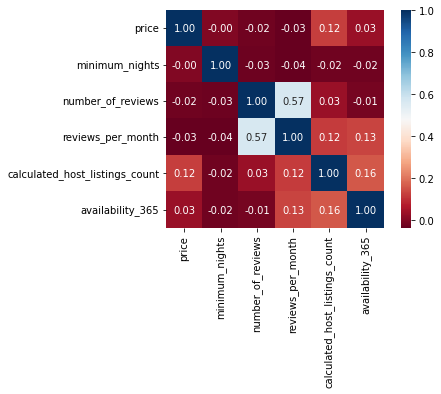

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` indica o tipo de imóvel a ser alugado.

No Airbnb pode-se alugar o apartamento/casa inteira ou apenas um quarto.

Para saber qual o tipo de imóvel que mais está sendo alugado, vamos utilizar a função `value_counts()`.

Nesse conjuno de dados o que mais está sendo alugado é o apartamento/casa toda, com 9.014.

Vamos mostrar também a porcentagem de cada tipo de imóvel alugado/ofertado.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()


Entire home/apt    9014
Private room       1865
Hotel room          138
Shared room          97
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    81.104913
Private room       16.780637
Hotel room          1.241677
Shared room         0.872773
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Porto-Portugual?**

Para saber qual a localidade mais cara, vamos usar a função `groupby()`.

Filtramos a coluna `price` e usamos a função `mean()` para saber a média.

Mostrando os 10 mais caros por ondem descendente de valor médio.

Nesse exmplo temos a localidade ***Negrelos (São Tomé)*** como sendo a mais cara.

In [ ]:
# ver preços por bairros, na média
df.groupby(by=['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Negrelos (São Tomé)                     600.000000
Cete                                    502.214286
Gondomar (São Cosme), Valbom e Jovim    442.611111
Paços de Brandão                        400.000000
Milheirós de Poiares                    342.000000
Cristelo                                314.000000
Sandim, Olival, Lever e Crestuma        268.483871
Vila Nova do Campo                      245.750000
São Miguel do Mato                      237.666667
Gião                                    231.500000
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=`longitude` e y=`latitude`.

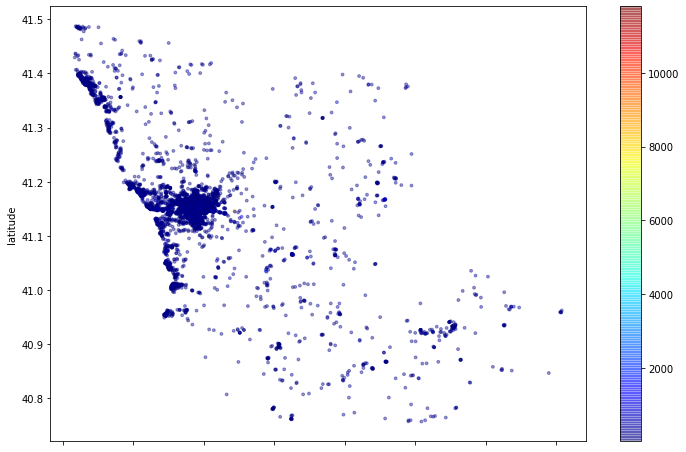

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Para saber o minimo de numero de noites, podemos utilizamos a função `mean()`, porém a função `describe()` nos traz mais informações e podemos perceber que a diferença entre o `min` e o `max` é muito grande.

O que pode, talvez, distorcer o valor da média, provavelmente por termos outlier

In [ ]:
# ver a média da coluna `minimum_nights`
df.minimum_nights.describe()

count    11114.000000
mean         4.223862
std         33.284097
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max       1124.000000
Name: minimum_nights, dtype: float64

## Conclusões


Foi apenas uma análise superficial e utilizando um conjunto de dados resumido.

Podemos notar que temos outliers e poucos imóveis disponiveis.

A presença de outliers afeta a analise de valores maximo e médio das variáveis númericas.

Poderemos em uma proxima oportunidades, trabalhar com o conjunto de dados mais detalhados.